In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import gamma

import sys
sys.path.insert(0, '../')
from utils import SpinChain

### Homogeneous XX chain

#### 1. Diagonalisation

The homogeneous chain studied in [1] has $J_n=J\in\mathbb{R}$, $h_n=h\in\mathbb{R}$. If we considered periodic boundary conditions, the system would be invariant under translations (all sites on the chain look the same). Translational invariance would imply momentum conservation, therefore we should work in the momentum (Fourier) basis.

$$
\tilde{a}_k = \frac{1}{\sqrt{N}}\sum\limits_{n=0}^{N-1} a_n e^{-i\frac{2\pi}{N}nk}
$$

So $E=\Phi^\dagger H^1\Phi$, with the diagonalisation being $\Phi_{nk}=\frac{1}{\sqrt{N}}e^{-i\frac{2\pi}{N}nk}$. Let's naively apply this diagonalisation to the $H^1$ matrix with free boundary conditions:

$$
\sum\limits_{n=0}^{N-1}\sum\limits_{m=0}^{N-1}\Phi^\dagger_{jn} H^1_{nm} \Phi_{mk} = 
\frac{1}{N}\sum\limits_{n=0}^{N-1}\sum\limits_{m=0}^{N-1}e^{i\frac{2\pi}{N}jn}e^{-i\frac{2\pi}{N}mk}(J\delta_{n+1,m}+J\delta_{n-1,m}+h\delta_{nm}) =
$$

$$
= \frac{1}{N}\left(
(e^{i\frac{2\pi}{N}k}+e^{-i\frac{2\pi}{N}k})J\sum\limits_{n=0}^{N-2}e^{i\frac{2\pi}{N}n(j-k)}+
h\sum\limits_{n=0}^{N-1}e^{i\frac{2\pi}{N}n(j-k)}
\right) =
$$

$$
= \left(2\cos\left(\frac{2\pi k}{N}\right)J+h\right)\delta_{jk}+ o\left(\frac{1}{N}\right)
$$

$$
\boxed{
\begin{aligned}
    H&\approx\sum\limits_{k=0}^{N-1}\varepsilon_k\tilde{a}^\dagger_k\tilde{a}_k, &
    \varepsilon_k&\approx2\cos\left(\frac{2\pi k}{N}\right)J+h
\end{aligned}
}
$$

The diagonalisation still works in the thermodynamic limit, when $N\rightarrow\infty$.

Text(0, 0.5, 'max |off diagonal|')

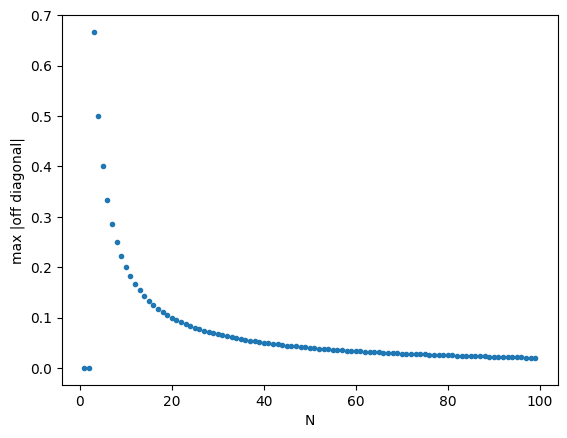

In [2]:
# Numerical test
@np.vectorize()
def offdiag_max(N, J, h):
    H1 = h * np.diag(np.ones(N)) + J * (np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1))
    FT = np.fft.fft(np.eye(N), norm='ortho') # Fourier transform matrix
    E = np.conj(FT) @ H1 @ FT 
    return np.max(np.abs(E-np.diag(np.diag(E))))

Nmax = 100
J = 1
h = 2

N = np.arange(1, Nmax)
o = offdiag_max(N, J, h)
plt.plot(N, o, '.')
plt.xlabel('N')
plt.ylabel(r'max |off diagonal|')

We can now easily find the ground state. It will have one particle at each site that $\varepsilon_n$ is negative, therefore there are only particles where

$$
- \left(\frac{h}{J}\right) > 2\cos\left(\frac{2\pi k}{N}\right)
$$

Or, in other words

$$
\begin{aligned}
k_c \leq k \leq N - k_c, & & k_c &= \left\lceil\frac{N}{2\pi}\arccos\left(\frac{-h}{2J} \right)\right\rceil
\end{aligned}
$$

We then realise that if $h/J>2$ (the magnetic field is strong), the ground state is the vacuum $|0\rangle$ (all spins up).

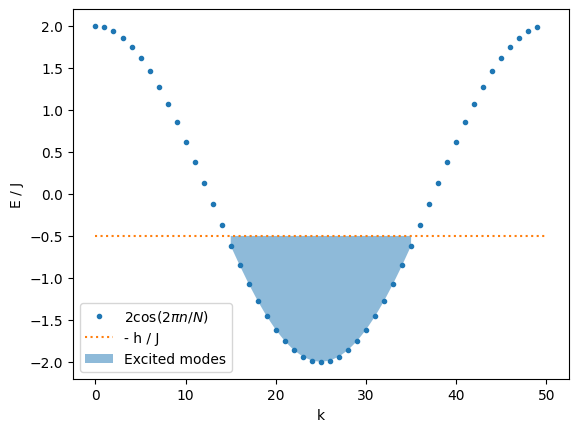

In [3]:
# Let's visualise this
N = 50
J = 2
h = 1

kc = int(np.ceil(N * np.arccos(- h / (2*J)) / (2 * np.pi)))
k = np.linspace(0, N-1, N)
osc = 2 * np.cos(2 * np.pi * k / N)
plt.plot(k, osc, '.')
plt.plot([0, N], [-h/J, -h/J], ':')
plt.fill_between(k[kc:N-kc+1], osc[kc:N-kc+1], - h / J, alpha=.5)
plt.xlabel('k')
plt.ylabel('E / J')
plt.legend(['$2\cos(2\pi n/N)$', '- h / J', 'Excited modes'])

#### 2. Correlation Matrix

Now the system has been diagonalised, we can calculate its correlation matrix:

$$
C_{nm} = \sum_{k=N/2-M/2}^{N/2+M/2} \Phi_{nk} \Phi^*_{mk}
 = \frac{1}{N} \sum_{k=-M/2}^{M/2} e^{-i\frac{2\pi}{N}(k+N/2)(n-m)} =
$$

$$
=  \frac{1}{N} \sum_{k=-M/2}^{M/2} \cos\left(\pi\left(\frac{2k}{N}+1\right)(n-m)\right) = 
(-1)^{n-m} \frac{2}{N} \sum_{k=0}^{M/2} \cos\left(\frac{2\pi k}{N}(n-m)\right)
$$

And in the thermodynamic limit

$$
C_{nm} \approx 2(-1)^{n-m} \int_0^{M/2N} \mathrm{d}x \cos(2\pi x(n-m)) = 
\boxed{(-1)^{n-m}\frac{M}{N}\mathrm{sinc}\left(\frac{\pi M}{N}(n-m)\right)}
$$

Let's verify this.

Calculating correlation matrix at filling 10/10... Done
Calculating correlation matrix at filling 10/10... Done
Calculating correlation matrix at filling 10/20... Done
Calculating correlation matrix at filling 10/30... Done
Calculating correlation matrix at filling 10/40... Done
Calculating correlation matrix at filling 10/50... Done
Calculating correlation matrix at filling 10/60... Done
Calculating correlation matrix at filling 10/70... Done
Calculating correlation matrix at filling 10/80... Done
Calculating correlation matrix at filling 10/90... Done
Calculating correlation matrix at filling 10/100... Done
Calculating correlation matrix at filling 10/110... Done
Calculating correlation matrix at filling 10/120... Done
Calculating correlation matrix at filling 10/130... Done
Calculating correlation matrix at filling 10/140... Done
Calculating correlation matrix at filling 10/150... Done
Calculating correlation matrix at filling 10/160... Done


Text(0, 0.5, 'max |C$_{the}$ - C$_{num}$|')

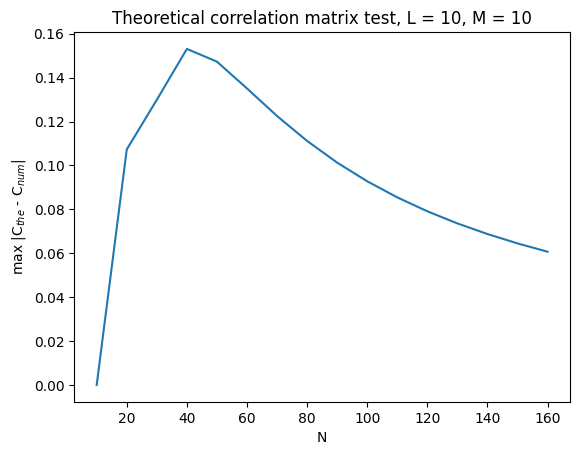

In [4]:
# Homogeneous chain correlation matrix
def corr_homogeneous(N, L, M):
    C = np.empty((L, L))
    for n in range(L):
        for m in range(L):
            C[n, m] = (-1)**(n-m) * M/N * np.sinc(M/N*(n-m))
    return C

# Test
N = np.arange(10, 161, 10)
J = 2
h = -1
L, M = 10, 10

@np.vectorize
def error(N, J, h, L, M):
    C_the = corr_homogeneous(N, L, M)
    homogeneous_chain = SpinChain(N, J * np.ones(N-1), h * np.ones(N))
    homogeneous_chain.set_filling(M)
    C_num = homogeneous_chain.correlation_matrix(L)
    return np.max(np.abs(C_the - np.array(C_num.tolist())))

err = error(N, J, h, L, M)
plt.plot(N, err)
plt.title(f'Theoretical correlation matrix test, L = {L}, M = {M}')
plt.xlabel('N')
plt.ylabel('max |C$_{the}$ - C$_{num}$|')

#### 3. Entanglement Entropy

So now all that remains is calculating the entanglement entropy. The procedure described in Refs. [1], [4] is rather involved. One starts by defining

$$
D(\mu) = \mathrm{det}(\mu I - C) = \prod_{i=0}^{L-1} (\mu - \nu_i)
$$

The Fisher-Hartwig conjecture provides an asymptotic expression for $D(\mu)$, which can be plugged into Cauchy's integral formula:

$$
S = \sum\limits_{i=0}^{L-1}e(1+\epsilon, \nu_i) = 
\sum\limits_{i=0}^{L-1}\frac{1}{2\pi i}\oint_{c(\epsilon,\delta)} \frac{e(1+\epsilon,\mu)}{\mu-\nu_i}\mathrm{d}\mu =
\frac{1}{2\pi i}\oint_{c(\epsilon,\delta)} e(1+\epsilon,\mu)\ \mathrm{d}(\log D(\mu))
$$

Here $e(1+\epsilon,\mu)$ is an analytic function such that $e(1, \nu_i)=s^{(2)}(\nu_i)$, and $c(\epsilon, \delta)$ is a dumbbell-shaped contour enclosing all eigenvalues $\nu_i$ on the real line [4]. We then take $\epsilon,\delta\rightarrow0^+$.

Finally, for a system filled up to $M=k_c$, Ref. [1] presents the analytical result for Shannon entropy. Ref. [3] however presents a more complete result. If we define $\lambda=\lim\limits_{N\rightarrow\infty} L/N$, the size of the studied block of particles relative to the entire system, the Rényi entropy at arbitrary filling for open boundary conditions is given by

$$
S_\alpha(N,\lambda) = \frac{c}{12}(1+\alpha^{-1})\log f(N,\lambda) + c'_\alpha +
\begin{cases}
O(N^{-1}), 
\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad \alpha<1 \\
\mu_\alpha\sin(\pi(2L+1)k_F) f(N, \lambda)^{-1/\alpha} + o(N^{-1/\alpha}),
\quad \alpha\geq1
\end{cases}
$$

There are many important points to discuss:

- $c$ is the central charge of a CFT related to the spin chain, at half filling $c=1$. It determines the model's universality class.

- $c'_\alpha = \frac{1}{2}(1+\alpha^{-1})\left\{\frac{\log2}{3} + \int_0^\infty\left[\frac{\mathrm{csch}\ t}{1-\alpha^{-2}}(\alpha^{-1}\mathrm{csch}(t/\alpha)-\mathrm{csch}\ t)-\frac{e^{-2t}}{6} \right]\frac{\mathrm{d}t}{t} \right\} $, noting that $\lim\limits_{\alpha\rightarrow1}\frac{\mathrm{csch}\ t}{1-\alpha^{-2}}(\alpha^{-1}\mathrm{csch}(t/\alpha)-\mathrm{csch}\ t) = \frac{1}{2}(t\ \mathrm{coth}\ t-1)\mathrm{csch}^2 t $, an ugly formula but nothing special. It is a non-universal constant [3].

- $f(N, \lambda)=\frac{N}{\pi}\sin(\pi\lambda)\sin(\pi k_F)$

- $k_F = M/N$ is the Fermi momentum, given by the last filled level.

- $\mu_\alpha = \frac{2^{1-\frac{2}{\alpha}}}{1-\alpha}\frac{\Gamma(\frac{1}{2}+\frac{1}{2\alpha})}{\Gamma(\frac{1}{2}-\frac{1}{2\alpha})},\quad\lim\limits_{\alpha\rightarrow1}\mu_\alpha=-\frac{1}{4}$

- $\sin(\pi(2L+1)k_F)$ produces parity oscillations, which for large $\alpha$ can obscure the leading asymptotic terms [3].

This complicated result is important because it allows us to guess the shape of $S_\alpha$ for inhomogeneous chains under certain conditions.

Text(0, 0.5, '$S_\\alpha$')

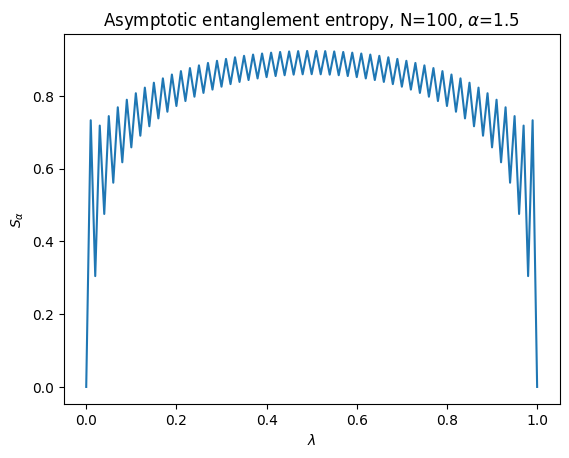

In [ ]:
# Non-universal constant
def cp(a):
    # Integral for a = 1
    if np.isclose(a, 1):
        f1 = lambda t: (.5 * (t / np.tanh(t) - 1) / np.sinh(t) ** 2 - np.exp(-2*t)/6) / t
        integral = quad(f1, 0, np.inf, epsabs=np.inf)[0]
    # Integral for a =/= 1
    else:
        fa = lambda t: ((1 / (a*np.sinh(t/a)) - 1 / np.sinh(t)) / ((1-a**-2)*np.sinh(t)) - np.exp(-2*t)/6) / t
        integral = quad(fa, 0, np.inf, epsabs=np.inf)[0]
    # Constant
    cp = .5 * (1 + 1/a) * (np.log(2)/3 + integral)
    return cp

# f function
def f(N, lamb, kF):
    return N / np.pi * np.sin(np.pi*lamb) * np.sin(np.pi*kF)

# mu function
def mu(a):
    if np.isclose(a, 1):
        return - .25
    return 2**(1 - 2/a) / (1 - a) * gamma(1/2 + 1/(2*a)) / gamma(1/2 - 1/(2*a))

# Asymptotic Rényi entropy
@np.vectorize()
def S_asymptotic(c, a, N, L, M):
    if np.isclose(L, 0) or np.isclose(L, N):
        return 0.
    lamb = L / N
    kF = M / N
    S = c/12 * (1 + a**-1) * np.log(f(N, lamb, kF)) + cp(a)
    if a < 1:
        return S
    S += mu(a) * np.sin(np.pi * (2*L + 1) * kF) * f(N, lamb, kF) ** (-1/a)
    return S

# Example/test
c = 1
a = 1.5
N = 100
L = np.arange(N+1)
M = N / 2

plt.plot(L / N, S_asymptotic(c, a, N, L, M))
plt.title(rf'Asymptotic entanglement entropy, N={N}, $\alpha$={a:.2e}'.rstrip('e+00'))
plt.xlabel('$\lambda$')
plt.ylabel(r'$S_\alpha$')

Calculating correlation matrix at filling 50/100... Done
Block L = 1, S = 0.69
Block L = 2, S = 0.38
Block L = 3, S = 0.72
Block L = 4, S = 0.51
Block L = 5, S = 0.75
Block L = 6, S = 0.58
Block L = 7, S = 0.77
Block L = 8, S = 0.63
Block L = 9, S = 0.79
Block L = 10, S = 0.67
Block L = 11, S = 0.81
Block L = 12, S = 0.70
Block L = 13, S = 0.83
Block L = 14, S = 0.72
Block L = 15, S = 0.84
Block L = 16, S = 0.74
Block L = 17, S = 0.85
Block L = 18, S = 0.76
Block L = 19, S = 0.86
Block L = 20, S = 0.78
Block L = 21, S = 0.87
Block L = 22, S = 0.79
Block L = 23, S = 0.88
Block L = 24, S = 0.80
Block L = 25, S = 0.89
Block L = 26, S = 0.81
Block L = 27, S = 0.89
Block L = 28, S = 0.82
Block L = 29, S = 0.90
Block L = 30, S = 0.83
Block L = 31, S = 0.90
Block L = 32, S = 0.84
Block L = 33, S = 0.91
Block L = 34, S = 0.84
Block L = 35, S = 0.91
Block L = 36, S = 0.85
Block L = 37, S = 0.92
Block L = 38, S = 0.85
Block L = 39, S = 0.92
Block L = 40, S = 0.85
Block L = 41, S = 0.92
Block L =

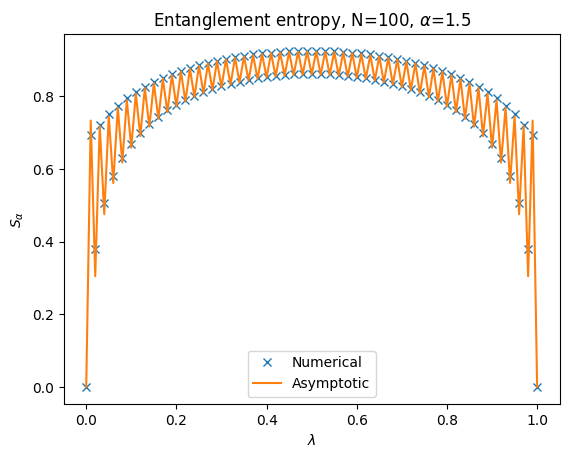

In [11]:
# Comparison of numerical solution against asymptotic solution 
N = 100
J = 2 * np.ones(N-1)
h = - np.zeros(N)
L = np.arange(N+1)
M = N//2
homogeneous_chain = SpinChain(N, J, h)
homogeneous_chain.set_filling(M)

c = 1
a = 1.5
S_num = homogeneous_chain.renyi_entropy(a, L) 
S_asm = S_asymptotic(c, a, N, L, M)

plt.plot(L / N, S_num, 'x', label='Numerical')
plt.plot(L / N, S_asm, label='Asymptotic')
plt.title(rf'Entanglement entropy, N={N}, $\alpha$={a:.2e}'.rstrip('e+00'))
plt.xlabel('$\lambda$')
plt.ylabel(r'$S_\alpha$')
plt.legend()

### References

[1] Latorre, J., & Riera, A. (2009). A short review on entanglement in quantum spin systems. *Journal of Physics A: Mathematical and Theoretical, 42(50), 504002*. Retrieved from https://arxiv.org/abs/0906.1499

[2] Finkel, F., & González-López, A. (2020). Inhomogeneous XX spin chains and quasi-exactly solvable models. *Journal of Statistical Mechanics: Theory and Experiment, 2020(9), 093105*. Retrieved from https://arxiv.org/abs/2007.00369

[3] Finkel, F., & González-López, A. (2021). Entanglement entropy of inhomogeneous XX spin chains with algebraic interactions. *Journal of High Energy Physics, 2021(12)*. Retrieved from https://arxiv.org/abs/2107.12200

[4] Jin, B.Q., & Korepin, V. (2004). Quantum Spin Chain, Toeplitz Determinants and the Fisher–Hartwig Conjecture. *Journal of Statistical Physics, 116(1–4), 79–95*. Retrieved from https://arxiv.org/abs/quant-ph/0304108